**Predicting miles per gallon (mpg) of car using features of car**

In [1]:
#import datafile directly from kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jayashreehv","key":"99bfa6ef2a7cf9bc8c5525407e1f69a2"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets list -s auto-mpg

ref                                              title                          size  lastUpdated          downloadCount  
-----------------------------------------------  ----------------------------  -----  -------------------  -------------  
uciml/autompg-dataset                            Auto-mpg dataset                6KB  2017-07-02 05:25:54          14252  
raghupalem/auto-mpg-data-set                      Auto MPG Data Set              6KB  2018-03-10 18:29:06            247  
fazilbtopal/auto85                               1985 Automobile Dataset        11KB  2019-03-18 13:22:11           1685  
debajyotipodder/co2-emission-by-vehicles         CO2 Emission by Vehicles       88KB  2020-08-05 11:57:13           1076  
sh6147782/mpgdata                                mpgdata                         2KB  2018-10-29 08:20:04            186  
gauravsharma99/car-mpg                           Car MPG                         7KB  2020-03-23 09:15:54            105  
kiran1995/auto-m

In [7]:
!kaggle datasets download -d uciml/autompg-dataset   -p /content

  0% 0.00/6.31k [00:00<?, ?B/s]
100% 6.31k/6.31k [00:00<00:00, 12.7MB/s]


In [8]:
!unzip \*.zip

Archive:  autompg-dataset.zip
  inflating: auto-mpg.csv            


In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
#os.chdir('.\\Desktop\\EDUCATE\\DATA CSV')
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
data=pd.read_csv('/content/auto-mpg.csv')

In [11]:
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


# Data Details


*   mpg - Milieage/Miles Per Galon
* cylinders - the power unit of the car where gasoline is turned into power
* displacement - engine displacement of the car
* horsepower - rate of the engine performance
* weight - the weight of a car
* acceleration - the acceleration of a car
* model - model of the car
* origin - the origin of the car 
* car - the name of the car



In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**Data Attribute Information**
* mpg: continuous
* cylinders: multi-valued discrete
* displacement: continuous
* horsepower: continuous
* weight: continuous
* acceleration: continuous
* model year: multi-valued discrete
* origin: multi-valued discrete
* car name: string (unique for each instance)

**Data Cleaning**

In [13]:
#check for null values

In [14]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

There are no null values , let's 

Check for blank or questions mark or any other symbol than 0

In [15]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

**There is "?" instead of null value, so replace it with mean or median **

In [16]:
data.horsepower=data.horsepower.str.replace('?','NaN').astype(float)
data.horsepower.fillna(data.horsepower.median(),inplace=True)
data.horsepower=data.horsepower.astype(int)
#Method 2
#data.horsepower.str.isdigit())
#data.replace('?', np.nan) 
#data = data.apply(lambda x: x.fillna(x.median()),axis=0) # all the records with nan will be filled with median of respective column

In [17]:
data.shape

(398, 9)

In [18]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

* Remove redundant column or feature
* Removing cars feature

In [19]:
data1=data.drop('car name',axis=1)

In [20]:
data1.shape

(398, 8)

* Check for duplicate values

In [21]:
data1.duplicated().sum()

0

     **No duplicates**

In [22]:
#Summary of Statistics of each feature
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.296482,38.224809,46.0,76.000,93.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [26]:
data2=data1.copy()
data2.drop(['model year','origin'],axis=1,inplace=True)
data2.describe

<bound method NDFrame.describe of       mpg  cylinders  displacement  horsepower  weight  acceleration
0    18.0          8         307.0         130    3504          12.0
1    15.0          8         350.0         165    3693          11.5
2    18.0          8         318.0         150    3436          11.0
3    16.0          8         304.0         150    3433          12.0
4    17.0          8         302.0         140    3449          10.5
..    ...        ...           ...         ...     ...           ...
393  27.0          4         140.0          86    2790          15.6
394  44.0          4          97.0          52    2130          24.6
395  32.0          4         135.0          84    2295          11.6
396  28.0          4         120.0          79    2625          18.6
397  31.0          4         119.0          82    2720          19.4

[398 rows x 6 columns]>

In [27]:
from sklearn.preprocessing import StandardScaler
X=data2.copy()
# create and fit scaler
scaler = StandardScaler()
scaler.fit(X)

# scale data set
Xt = scaler.transform(X)

# create data frame with results
stats = np.vstack((X.mean(axis=0), X.var(axis=0), Xt.mean(axis=0), Xt.var(axis=0))).T
feature_names = data2.columns
columns = ['unscaled mean', 'unscaled variance', 'scaled mean', 'scaled variance']

df = pd.DataFrame(stats, index=feature_names, columns=columns)
df

,unscaled mean,unscaled variance,scaled mean,scaled variance
mpg,23.514573,61.089611,7.141133e-17,1.0
cylinders,5.454774,2.893415,-3.570567e-17,1.0
displacement,193.425879,10872.199152,-1.785283e-17,1.0
horsepower,104.296482,1461.136058,0.000000e+00,1.0
weight,2970.424623,717140.990526,-1.606755e-16,1.0
acceleration,15.568090,7.604848,-2.677925e-16,1.0


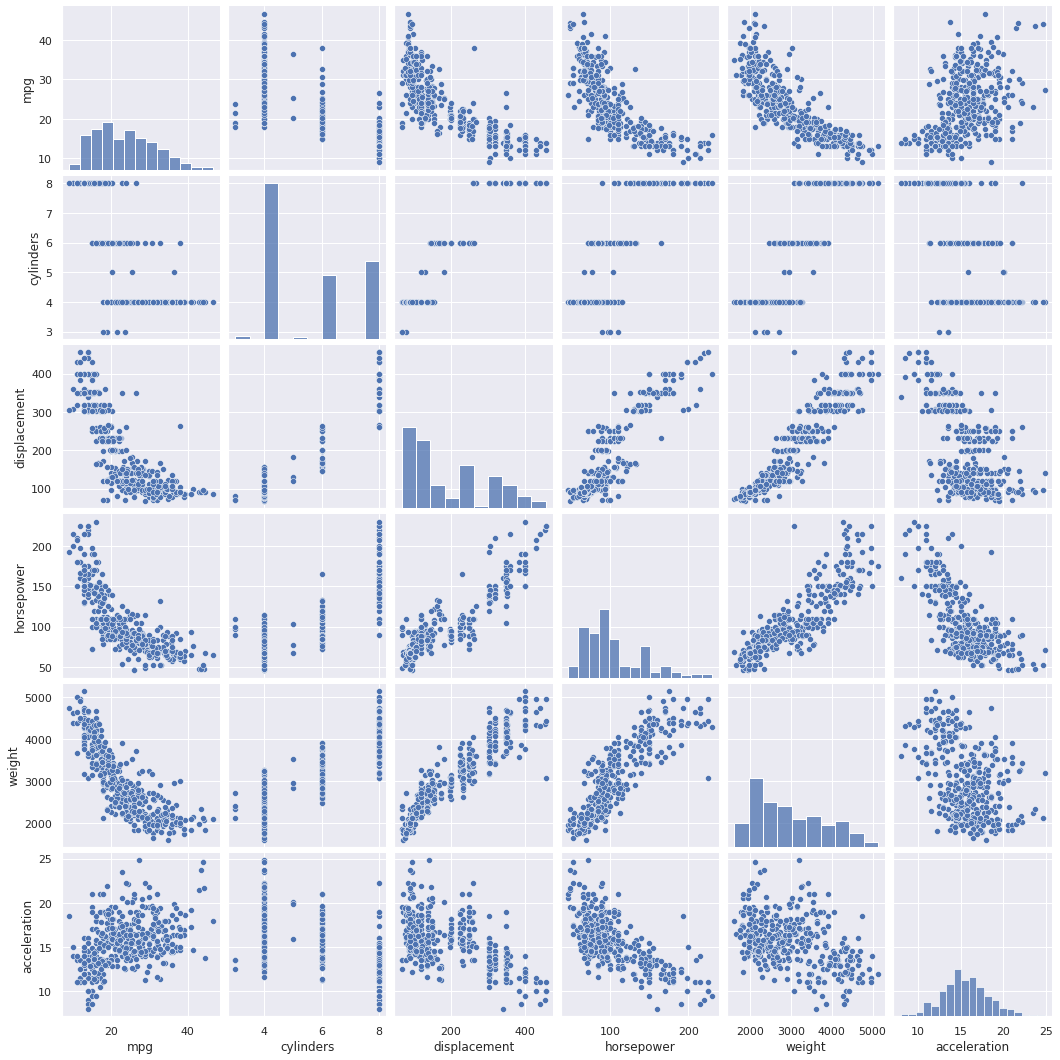

In [28]:
import seaborn as sns
sns.pairplot(data2)

* mpg has negative correlation with cylinders,displacement,horsepower, weight and positive correlation with acceleration (obvious)


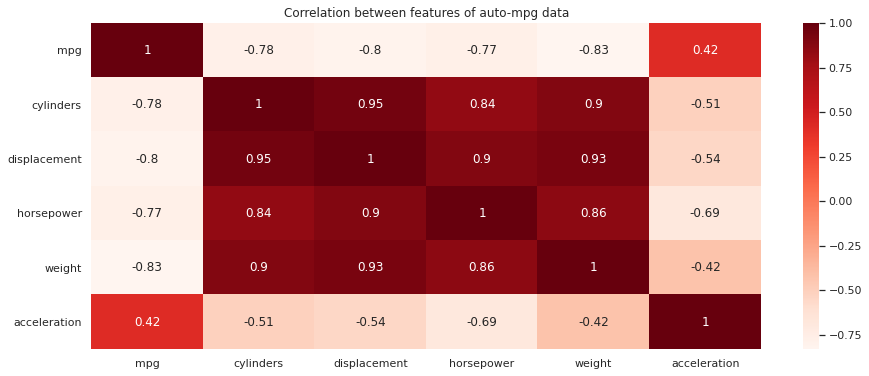

In [29]:
#Heatmap to visually highly correlated features
plt.figure(figsize=(15,6))
sns.heatmap(data2.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Correlation between features of auto-mpg data', fontsize=12)
plt.show()

From heatmap, it is clear that cylinders, displacement, horsepower and weight are highly correlated

In [30]:
data2.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.775396,-0.804203,-0.773522,-0.831741,0.420289
cylinders,-0.775396,1.000000,0.950721,0.841367,0.896017,-0.505419
displacement,-0.804203,0.950721,1.000000,0.895849,0.932824,-0.543684
horsepower,-0.773522,0.841367,0.895849,1.000000,0.862502,-0.686676
weight,-0.831741,0.896017,0.932824,0.862502,1.000000,-0.417457
acceleration,0.420289,-0.505419,-0.543684,-0.686676,-0.417457,1.000000


Since cylinders, displacement , horsepower and weight features are highly correlated, it is necessary to find multicollinearity to finalize the features for model building

In [31]:
# Find multicollinearity using Variance Inflation factor (VIF)
# from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_comp(data):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["var"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

    return(vif)

In [32]:
data2.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5


In [33]:
vifdata=data2.iloc[:,0:6]
vifdata.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration'],
      dtype='object')

In [34]:
vif_comp(vifdata)

,var,VIF
0,mpg,19.324520
1,cylinders,107.208326
2,displacement,79.687627
3,horsepower,50.938603
4,weight,147.918500
5,acceleration,51.632346


In [41]:
#dropping cylinders, displacement and weight from the dataset and then checking VIF

In [35]:
vifnewdata= vifdata.drop(['cylinders','displacement','weight'],axis=1)
vifnewdata.columns
vif_comp(vifnewdata)

,var,VIF
0,mpg,13.135518
1,horsepower,4.969197
2,acceleration,20.846492


In [37]:
data3=data1.drop(['cylinders','displacement','weight'],axis=1)

In [38]:
data3.corr().mpg

mpg             1.000000
horsepower     -0.773522
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

In [57]:
data_cat =data1.loc[:, 'mpg':'model year']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

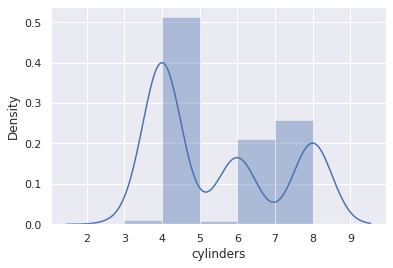

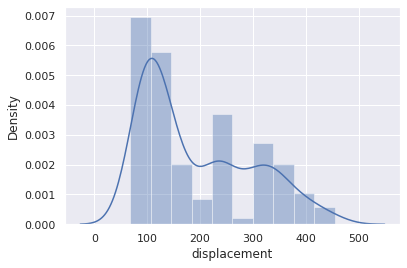

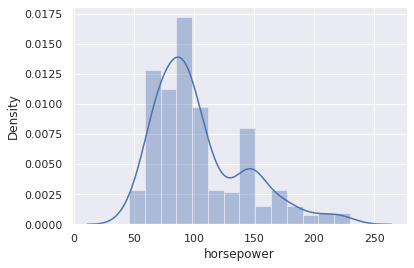

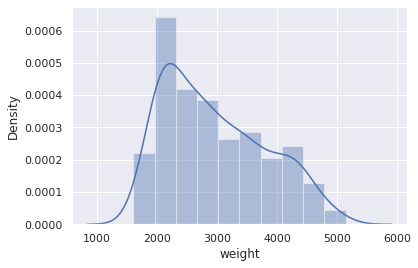

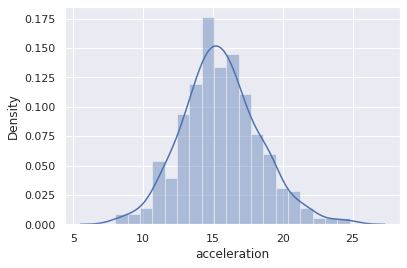

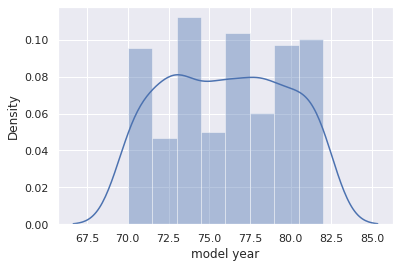

In [64]:
a=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
for i in a:
    plt.figure()
    sns.distplot(data1[i])

* Displacement, horsepower and weight are skewed right
* Acceleration is normally distributed
* model year is also normally distributed but with a broader range

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


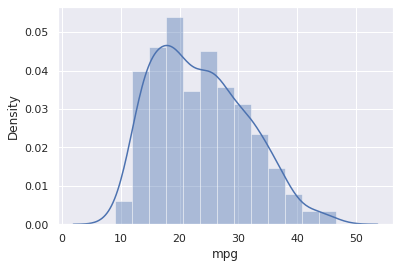

In [65]:
sns.distplot(data1['mpg'])

mpg is slightly skewed to right

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


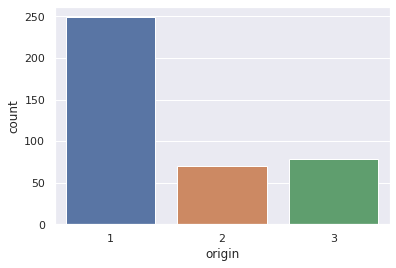

In [66]:
# Count plot for discrete numerical feature: origin
sns.countplot(data1['origin'])

origin 1 records are more compared to origin 2 and 3

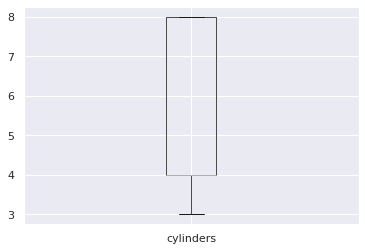

In [67]:
data1.boxplot(column=['cylinders'])

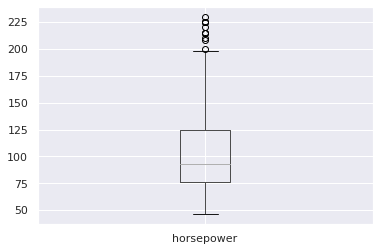

In [68]:
data1.boxplot(column=['horsepower'])

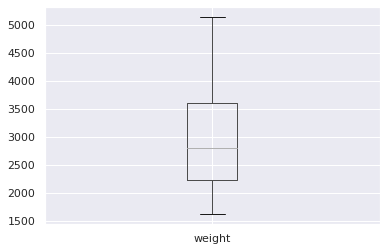

In [72]:
data1.boxplot(column=['weight'])

In [74]:
from scipy import stats
z = np.abs(stats.zscore(data1['horsepower']))

In [90]:
data4=data1[(z<3)]

In [91]:
data4.shape

(393, 8)

In [93]:
data1.shape

(398, 8)

In [94]:
#It shows that there are 5 records with outliers.

In [95]:
data4.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1


In [96]:
# Since the outlier record count is very less, we can remove the recordings with outlier values
# let's drop highly correlated features and build regression models

# **Base Model**

In [98]:
X=data4.drop(['mpg','cylinders','displacement','weight'],axis=1)
y=data4.mpg
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)
# Scale the fetures to align them on the same scale
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
linreg=LinearRegression().fit(X_train,y_train)
print(r2_score(y_test,linreg.predict(scaler.transform(X_test))))

0.7418680040593177


In [109]:
predict_lr = linreg.predict(scaler.transform(X_test))  # make prediction with the fitted model

# Model score on training set
print('Train score= {}'.format(linreg.score(X_train,y_train)))
# Model Score on test set
print('Test score={}'.format(linreg.score(scaler.transform(X_test),y_test)))
#  accuracy of the model
print(' accuracy of the model= {}'.format(r2_score(y_test, predict_lr)))
# compute the mean squared error of the model
print('Mean Squared Error= {}'.format(mean_squared_error(y_test,predict_lr)))

Train score= 0.7664817122531389
Test score=0.7418680040593177
 accuracy of the model= 0.7418680040593177
Mean Squared Error= 17.163950561891056


In [110]:
 # Ridge regression & Lasso regression models 
#Ridge and Lasso performs regularization hence are most powerful. These two are useful when huge no of features are available.
#Ridge- performs L2 regularization ie adds penalty equivalent to square of the magnitude of coefficients. Prevents overfitting
#Lasso - Performs L1 regularization: adds penalty equivalent to absolute value of the magnitude of coefficeints. provides sparse solutions

In [112]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.utils import shuffle
X_train, X_test, y_train, y_test = train_test_split(*shuffle(X, y), test_size=0.1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

lin_reg = LinearRegression().fit(X_train, y_train)

alphas = np.logspace(-2, 2, 100)
ridge_coefs = []
ridge_scores = []
lasso_coefs = []
lasso_scores = []
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha).fit(X_train, y_train)
    lasso_reg = Lasso(alpha=alpha).fit(X_train, y_train)
    ridge_coefs.append(ridge_reg.coef_)
    ridge_scores.append(r2_score(y_test, ridge_reg.predict(scaler.transform(X_test))))
    lasso_coefs.append(lasso_reg.coef_)
    lasso_scores.append(r2_score(y_test, lasso_reg.predict(scaler.transform(X_test))))

lin_score = r2_score(y_test, lin_reg.predict(scaler.transform(X_test)))
print('Linear regression score: %0.2f' % lin_score)
print('Ridge regression score: %0.2f' % max(ridge_scores))
print('Lasso regression score: %0.2f' % max(lasso_scores))

Linear regression score: 0.80
Ridge regression score: 0.81
Lasso regression score: 0.81


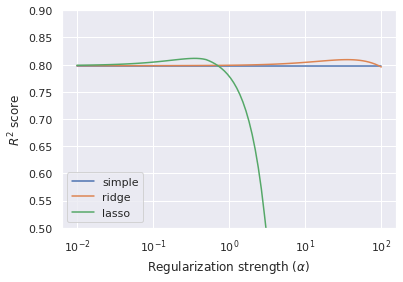

In [114]:
plt.figure()
plt.gca().set_xscale('log')
plt.gca().set_ylim([.5, .900])
plt.plot(alphas, np.repeat(lin_score, len(alphas)), label='simple')
plt.plot(alphas, ridge_scores, label='ridge')
plt.plot(alphas, lasso_scores, label='lasso')
plt.xlabel(r'Regularization strength ($\alpha$)')
plt.ylabel(r'$R^2$ score')
plt.legend();

# **Ensemble Models**

In [117]:
#Ensemble model uses the predictions of multiple estimators to make a final prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model=RandomForestRegressor(n_estimators=50)
gs=GridSearchCV(model,
                {'max_features':np.arange(.05,1,.05)},
                cv=5,
                n_jobs=4,
                scoring='neg_mean_squared_error')
gs.fit(X_train,y_train)
model=gs.best_estimator_
print(gs.best_params_)
print(r2_score(y_test,model.predict(scaler.transform(X_test))))

{'max_features': 0.8500000000000001}
0.8692715113970129


In [119]:
gs1=GridSearchCV(model,
                {'max_features':np.arange(1,50,5)},
                cv=5,
                n_jobs=4,
                scoring='neg_mean_squared_error')
gs1.fit(X_train,y_train)
model1=gs1.best_estimator_
print(gs1.best_params_)
print(r2_score(y_test,model1.predict(scaler.transform(X_test))))

{'max_features': 1}
0.8634857301923837


 A random forest model trains many decision trees on random pieces of the data and averages together their predictions. In a sense, the prediction of any individual tree becomes a feature in the final prediction.

## **Custom Ensemble Models**

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin

class EstTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator
    
    def fit(self, X, y):
        self.estimator.fit(X, y)
        return self

    def transform(self, X):
        return np.atleast_2d(self.estimator.predict(X)).T

In [127]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline


knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

gs = GridSearchCV(knn,
                  {'knn__n_neighbors': range(5, 26, 5)},
                  cv=5,
                  n_jobs=4,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)
print(gs.best_params_)

{'knn__n_neighbors': 5}


In [129]:
from sklearn.pipeline import FeatureUnion

ensemble = FeatureUnion([
    ('rf', EstTransformer(DecisionTreeRegressor(max_depth=5, min_samples_split=45))),
    ('knn', EstTransformer(KNeighborsRegressor(n_neighbors=10)))
])

model = Pipeline([
    ('scaler', StandardScaler()),
    ('ensemble', ensemble),
    ('combine', LinearRegression(fit_intercept=True))
    ])

model.fit(X_train, y_train)

print(r2_score(y_test, model.predict(scaler.transform(X_test))))

0.8846492625894871


**Conclusion:** 
Data cleaning and EDA are completed to understand the feature importance 
Feature selection is done based on the correlation and multicollinearity factor. Since the number of features are less PCA method is not adopted
Linear, Ridge, Lasso regressor are attempted to compare the performance with respect to r2 score.
RandomForestRegressor and Custom ensemble models with DecisionTreeRegressor and KNeighborsRegressor are attempted to boost the r2score. It shows custom ensemble model gives us better performance